In [7]:
#There was an issue with my past clustering file (it was on a VM I lost access to, so rebuilt here)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import math
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing
from sklearn import mixture

In [2]:
#Loading all our data for clustering
buildingDF = pd.read_excel('MTM3_Export_v0.02.xlsx', sheet_name="Data")

In [3]:
#selecting fields for clustering
clusterDF = buildingDF.filter(items =['AVG_HEIGHT', 'Perimeter', 'Area', 'Simple_Volume', 'Simple_Surface_Area']).dropna() #'Lat_Square', 'Lon_Square'

#to give an aspect ratio that is abivalent to shape direction. Adding 1 to denominator to prevent massive sizes
clusterDF['stretch'] = clusterDF['Perimeter'] / (clusterDF['Area'] + 1)
clusterArray = clusterDF.values

#constructing a second clusterDF the does include the spatial location
clusterDF2 = buildingDF.filter(items = ['AVG_HEIGHT', 'Perimeter', 'Area', 'Simple_Volume', 'Simple_Surface_Area', 'Lon_Square', 'Lat_Square'])
clusterDF2['stretch'] = clusterDF2['Perimeter'] / (clusterDF2['Area'] + 1)
clusterArray2 = clusterDF2.values


In [27]:
clusterDF

,AVG_HEIGHT,Perimeter,Area,Simple_Volume,Simple_Surface_Area,stretch
0,7.3090,180.218234,1906.173775,13932.224123,5129.562624,0.094495
1,8.2040,220.001068,1434.416417,11767.952288,4673.721593,0.153266
2,4.1913,111.077719,612.515578,2567.236540,1690.591200,0.181051
3,4.8489,89.451738,413.462391,2004.837790,1260.667316,0.215826
4,5.9776,68.827410,263.809671,1576.948689,939.042070,0.259913
5,6.1068,68.789806,257.134312,1570.267819,934.354214,0.266488
6,5.9828,65.863145,256.287096,1533.314436,906.620213,0.255991
7,5.9179,65.450621,254.699539,1507.286402,896.729309,0.255967
8,5.7070,66.090744,254.570502,1452.833853,886.320879,0.258601
9,6.4652,66.542222,253.826687,1641.040299,937.862146,0.261127


## Non scaled K-Means

In [37]:
distortions = []

#fitting all datapoints using cross validation to determine the optimal number of clusters
for i in range(1,15):
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(clusterArray)
    distortions.append(np.average(np.min(cdist(clusterArray, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))

Text(0.5,1,'Elbow curve')

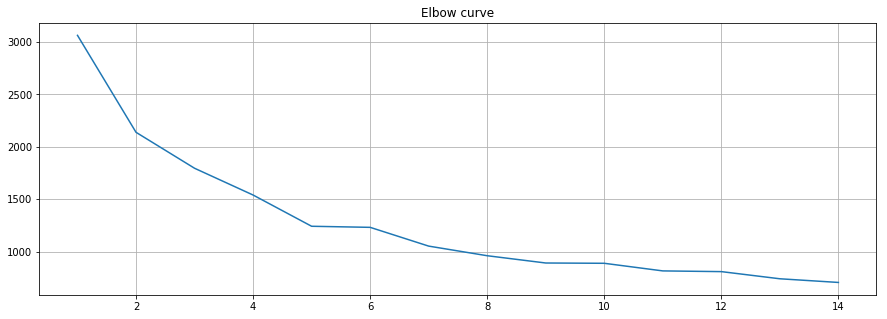

In [38]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), distortions)
plt.grid(True)
plt.title('Elbow curve')

## Scaled K-means

In [4]:
#as the features have very different ranges, some might be highly prioritized over others. This normalizes each column 
#to avoid this issue

min_max_scaler = preprocessing.MinMaxScaler()
arrayScaled = min_max_scaler.fit_transform(clusterArray)

In [44]:
distortionScaled = []

#fitting all datapoints using cross validation to determine the optimal number of clusters
for i in range(1,15):
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(arrayScaled)
    distortionScaled.append(np.average(np.min(cdist(arrayScaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))

Text(0.5,1,'Elbow Curve scaled')

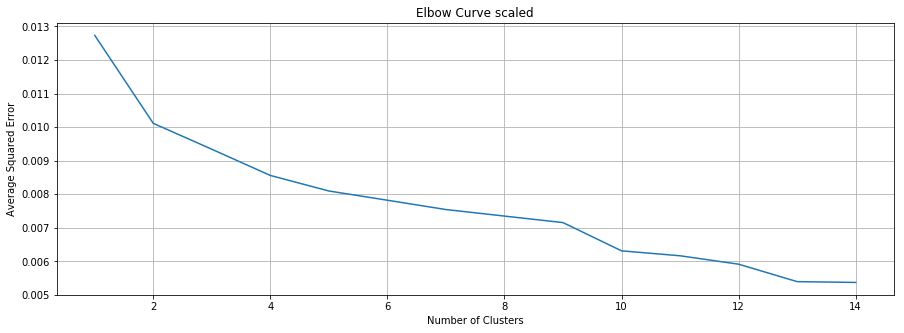

In [100]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), distortionScaled)
plt.xlabel("Number of Clusters")
plt.ylabel("Average Squared Error")
plt.grid(True)
plt.title('Elbow Curve scaled')

The extremely smooth nature of this curve suggests that really every cluster size is valid! Note that there is a spike in effectiveness at 10, so we're going to dive deeper into this point

## Cluster Purity and Interpretation for K-means

In [55]:
#training our optimal model
kmeanOptimal = KMeans(n_clusters=10)
kmeanOptimal.fit(arrayScaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
#loading in the labeled Data
labeledDF = pd.read_excel('Labelled_Data.xlsx', sheet_name='Output')
clusterLabelDF =labeledDF.filter(items =['AVG_HEIGHT', 'SHAPE_LENG', 'SHAPE_AREA', 'Simple Volume', 'Simple Surface Area']).dropna() #'Lat_Square', 'Lon_Square'

#to give an aspect ratio that is abivalent to shape direction. Adding 1 to denominator to prevent massive sizes
clusterLabelDF['stretch'] = clusterLabelDF['SHAPE_LENG'] / (clusterLabelDF['SHAPE_AREA'] + 1)
clusterLabelArray = clusterLabelDF.values

In [10]:
#ensuring that the transformation is the same
clusterLabelBig = np.concatenate((clusterLabelArray, clusterArray), axis=0)

min_max_scaler = preprocessing.MinMaxScaler()
bigScaled = min_max_scaler.fit_transform(clusterLabelBig)

clusterLabelArrayScaled = bigScaled[:int(clusterLabelArray.shape[0]),:]

In [91]:
#checking cluster prediction for each labeled point
prediction =kmeanOptimal.predict(clusterLabelArrayScaled)
clusterLabelDF['cluster'] = prediction
clusterLabelDF['label'] = labeledDF['Building_Typology']

In [96]:
#saving our results to excel
writer = pd.ExcelWriter('cluster_output.xlsx', engine='xlsxwriter')
clusterLabelDF.to_excel(writer, sheet_name='Data')
writer.save()

In [89]:
labeledDF

,MIN_HEIGHT,MAX_HEIGHT,AVG_HEIGHT,SHAPE_LENG,SHAPE_AREA,Simple Volume,Simple Surface Area,Latitude Quadrant,Longitude Quadrant,Building_Typology
0,0.0000,9.8253,5.74000,61.535222,183.015834,1050.510885,10303.293150,134,49,Small Commercial
1,0.0000,7.9909,5.12550,60.832655,177.566515,910.117173,10254.613469,137,49,Attached House
2,0.0000,8.9625,5.57010,53.302528,141.466653,787.983405,8981.266229,136,48,Attached House
3,0.0000,8.3812,6.11950,52.558966,139.082986,851.118330,9108.808160,144,49,Detached House
4,0.0000,6.5232,4.36520,55.845443,123.957598,541.099705,8927.413959,130,50,Commercial
5,0.0000,9.2491,6.43640,65.237035,233.806858,1504.874461,7380.978042,20,89,Detached House
6,3.3671,7.9324,6.39170,61.068415,233.001275,1489.274248,6953.727742,23,89,Office
7,0.0000,5.2157,2.82870,72.092664,205.232819,580.542076,7817.986839,24,89,Small Commercial
8,0.0000,9.0673,6.27390,52.569922,169.172368,1061.370523,6041.760685,27,86,Attached House
9,0.0000,8.6287,6.52060,50.892417,158.844998,1035.764695,5832.086965,24,85,Attached House


## Bayesian Gaussian Mixture Model

In [8]:
gmm = mixture.BayesianGaussianMixture(n_components=14, covariance_type='full').fit(arrayScaled)

C:\Anaconda\envs\warmup\lib\site-packages\sklearn\mixture\base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [11]:
prediction = gmm.predict(clusterLabelArrayScaled)

In [22]:
#saving our results to excel
writer = pd.ExcelWriter('gmm_output.xlsx', engine='xlsxwriter')
clusterLabelDF.to_excel(writer, sheet_name='Data')
writer.save()

In [19]:
unique, counts = np.unique(prediction, return_counts=True)
dict(zip(unique, counts))

{2: 10, 3: 44, 5: 6, 6: 125, 8: 32, 9: 9071, 10: 35, 11: 3, 12: 164}

In [20]:
clusterLabelDF['cluster'] = prediction
clusterLabelDF['label'] = labeledDF['Building_Typology']

In [21]:
clusterLabelDF

,AVG_HEIGHT,SHAPE_LENG,SHAPE_AREA,Simple Volume,Simple Surface Area,stretch,cluster,label
0,5.74000,61.535222,183.015834,1050.510885,10303.293150,0.334402,9,Small Commercial
1,5.12550,60.832655,177.566515,910.117173,10254.613469,0.340672,9,Attached House
2,5.57010,53.302528,141.466653,787.983405,8981.266229,0.374140,9,Attached House
3,6.11950,52.558966,139.082986,851.118330,9108.808160,0.375199,9,Detached House
4,4.36520,55.845443,123.957598,541.099705,8927.413959,0.446915,9,Commercial
5,6.43640,65.237035,233.806858,1504.874461,7380.978042,0.277833,9,Detached House
6,6.39170,61.068415,233.001275,1489.274248,6953.727742,0.260975,9,Office
7,2.82870,72.092664,205.232819,580.542076,7817.986839,0.349569,9,Small Commercial
8,6.27390,52.569922,169.172368,1061.370523,6041.760685,0.308922,9,Attached House
9,6.52060,50.892417,158.844998,1035.764695,5832.086965,0.318386,9,Attached House
